# Importando **Librerias**

In [ ]:
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
import itertools
import io
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from IPython.display import clear_output
from sklearn.neighbors import KernelDensity
from tabulate import tabulate
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# Cargando DataSet

In [ ]:
data_to_load = files.upload()

Saving spambase.data to spambase.data


# ANALISIS DE LOS DATOS

In [ ]:
data = pd.read_csv(io.BytesIO(data_to_load['spambase.data']))
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,"char_freq_,",char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,SpamClase
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Dimensiones del dataset:

In [ ]:
data.shape

(4601, 58)

Mas informacion del dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


Verificando si hay nulos o datos perdidos:

In [ ]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Distribución de las clases:

0    2788
1    1813
Name: SpamClase, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


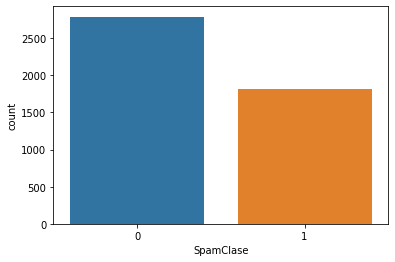

In [ ]:
print(data['SpamClase'].value_counts())
sns.countplot(data['SpamClase'])

Separacion de X y Y:

In [ ]:
X = data.drop('SpamClase', axis=1).values
Y = data['SpamClase'].values
print (X.shape , Y.shape)

(4601, 57) (4601,)


Separacion de test y train: (Para probar codigos y disminuir tiempo de ejecucion)

In [ ]:
#Para pruebas con modelos complicados
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print (X_test.shape , Y_test.shape)

(921, 57) (921,)


Funcion para graficar matriz de confusion:

In [ ]:
 #NORMALIZAR
def calcularMatrizCF(matris,titulo):
    a = (matris[0,0] +  matris[0,1])
    b = (matris[1,0] +  matris[1,1])
    matris[0,0] =  matris[0,0] / a
    matris[0,1] =  matris[0,1] / a
    matris[1,0] =  matris[1,0] / b
    matris[1,1] =  matris[1,1] / b
    #MATRIZ DE CONFUSION
    sns.heatmap(matris,annot=True)
    plt.xlabel('Label Predicha')
    plt.ylabel('Label Verdadera')
    plt.title(titulo)
    print(matris)

# Analisis discriminante Cuadrático

In [ ]:
def ejecutarQDA(x, y, params_reg,tol):

    idx = 0
    kf = KFold(n_splits=10) 
    # crear una lista con la combinaciones de los elementos de cada list
    resultados = pd.DataFrame()
    tol_regs = list(itertools.product(tol ,params_reg))
    conf_matrix_list_of_arrays = np.zeros(2)
    for params in tol_regs:
        tol, param_reg = params
        errores_train = []
        errores_test = []
        pct_support_vectors = []
        EficienciaVal = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        for train_index, test_index in kf.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]  
            # normalizar los datos
            scaler = StandardScaler().fit(X= X_train)  
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=param_reg, tol=tol) 
            # Entrenar el modelo
            clf.fit(X_train, y_train)
            # calculo de errores
            y_test_pred = clf.predict(X_test)
            y_train_pred = clf.predict(X_train)
            conf_matrix = confusion_matrix(y_test, y_test_pred)
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            # error y pct de vectores de soporte
            errores_train.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
            errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))
            # contar muestras de entrenamiento
            #ypredict.append((y_test_pred))
            #ytesetes.append((y_test))
            Macc.append(accuracy_score(y_test, y_test_pred))
            Mpre.append(precision_score(y_test, y_test_pred))
            Mrec.append(recall_score(y_test, y_test_pred))
            EficienciaVal.append(np.mean(y_test_pred.ravel() == y_test.ravel()))
            Mf1.append(f1_score(y_test, y_test_pred))
            clear_output(wait=True)

    

        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'tol'] = tol
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'Intervalo de confianza'] = np.std(EficienciaVal)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        
        idx+=1
    return (resultados, conf_matrix_list_of_arrays)

In [ ]:
resultadosQDA, matrisQDA = ejecutarQDA(x =X ,y=Y,params_reg = [0.001, 0.01,0.1,0.2,0.3,0.4,0.5, 1],
                                 tol = [1]
                                )

resultadosQDA

,param_reg,tol,error de entrenamiento,error de prueba,accuracy real,Intervalo de confianza,precision_score,recall_score,f1_score
0,0.001,1.0,0.827090,0.818919,0.818919,0.134150,0.398232,0.378313,0.387973
1,0.010,1.0,0.807578,0.798919,0.798919,0.145413,0.398246,0.380529,0.389149
2,0.100,1.0,0.767973,0.760876,0.760876,0.175533,0.398284,0.384787,0.391402
3,0.200,1.0,0.763723,0.745876,0.745876,0.182773,0.398020,0.382978,0.390326
4,0.300,1.0,0.773166,0.746094,0.746094,0.180671,0.398241,0.381603,0.389693
5,0.400,1.0,0.799779,0.746537,0.746537,0.164377,0.398228,0.373526,0.385438
6,0.500,1.0,0.825957,0.753714,0.753714,0.146103,0.399198,0.364158,0.380766
7,1.000,1.0,0.888889,0.850498,0.850498,0.083832,0.399365,0.305343,0.345755


Mejor Resultado Analisis Cuadratico

In [ ]:
(resultadosQDA
 .groupby(['param_reg','tol'], as_index=False)['accuracy real'].mean()
 .sort_values(by='accuracy real', ascending = False)
 .head(1))

,param_reg,tol,accuracy real
0,1.0,1.0,0.850498


Matriz de Confusión Analisis Cuadratico

[[0.90674319 0.09325681]
 [0.23607281 0.76392719]]


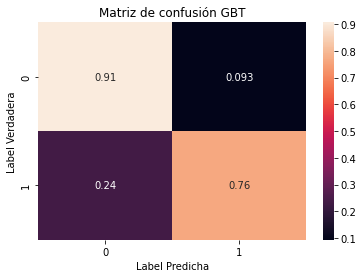

In [ ]:
resultadosQDA, matrisQDA = ejecutarQDA(x =X ,y=Y,params_reg = [1],
                                 tol = [1]
                                )
calcularMatrizCF(matrisQDA, "Matriz de confusión GBT")

# Ventana de Parzen

In [ ]:
import scipy as sc

def MAPE(Y_est,Y):
    """Mean Absolute Percentage Error para los problemas de regresión
    Y_est: numpy array con los valores estimados
    Y: numpy array con las etiquetas verdaderas
    retorna: mape
    """
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape

def kernel_gaussiano(x):
    return np.exp((-0.5)*x**2)

def ParzenWindow(x,Data,h):
    h = h
    Ns = Data.shape[0]
    suma = 0
    for k in range(Ns):
        u = sc.spatial.distance.euclidean(x,Data[k,:])
        suma += kernel_gaussiano(u/h)
    return suma

def parzenClass(X_train, Y_train, X_val, ancho_h):
    h = ancho_h
    Nv = len(X_val)
    Y_est = np.array([])
    
    X_clases = []
    
    for clase in np.unique(Y_train):
        X_clases.append(X_train[np.where(Y_train == clase )])    

    probabilidades = []
    j = 0
    for x_clase in X_clases: 
        distances = sc.spatial.distance_matrix(X_val, x_clase) / h
        
        for i in range(Nv):
            k = kernel_gaussiano(distances[i])
            P = np.sum(k)
            if(j == 0):
                probabilidades.append([P, 0.0, 0.0])
            else:
                probabilidades[i][j] = P
        j += 1   
    
    for p in probabilidades:
        Y_est = np.append(Y_est,p.index(max(p)))
    return Y_est#Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.  

#ejercicio de codigo
def experimentarParzen (X, Y, hs):
    # se usa la función para implementar la estrategia de validación.
    skf = KFold(n_splits=10)
    resultados = pd.DataFrame()
    idx = 0
    conf_matrix_list_of_arrays = np.zeros(2)
    # iteramos sobre los valores de hs
    for h in hs:
        # lista para almacenar los errores de cada iteración
        # de la validación
        error_temp = []
        Macc = []
        EficienciaVal = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        for train, test in skf.split(X, Y):

            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #normalizamos los datos
            scaler = StandardScaler()
            scaler.fit(Xtrain)
            Xtrain = scaler.transform(Xtrain)
            Xtest = scaler.transform(Xtest)
            Yest = parzenClass(Xtrain,Ytrain,Xtest,h)
            conf_matrix = confusion_matrix(Ytest, Yest)
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            Macc.append(accuracy_score(Ytest, Yest))
            Mpre.append(precision_score(Ytest, Yest, average='micro'))
            Mrec.append(recall_score(Ytest, Yest, average='micro'))
            Mf1.append(f1_score(Ytest, Yest, average='micro'))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
    
        resultados.loc[idx,'ancho de ventana'] = h 
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx+=1
    return (resultados, conf_matrix_list_of_arrays)



Resultado Ventana de parzen

In [ ]:
hs = [0.05, 0.1, 0.5, 1, 2, 5, 10]
experimentos_parzen, matrisPARZEN = experimentarParzen(X,Y, hs)
experimentos_parzen

,ancho de ventana,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,0.05,0.746205,0.272827,0.746205,0.746205,0.746205
1,0.10,0.812033,0.146344,0.812033,0.812033,0.812033
2,0.50,0.871352,0.067827,0.871352,0.871352,0.871352
3,1.00,0.865718,0.097320,0.865718,0.865718,0.865718
4,2.00,0.756669,0.253426,0.756669,0.756669,0.756669
5,5.00,0.612170,0.466459,0.612170,0.612170,0.612170
6,10.00,0.608042,0.479418,0.608042,0.608042,0.608042


Mejor resultado Ventana de parzen

In [ ]:
(experimentos_parzen
 .groupby(['ancho de ventana'], as_index=False)['accuracy real'].mean()
 .sort_values(by='accuracy real', ascending = False)
 .head(1))

,ancho de ventana,accuracy real
2,0.5,0.871352


[[0.91857963 0.08142037]
 [0.20132377 0.79867623]]


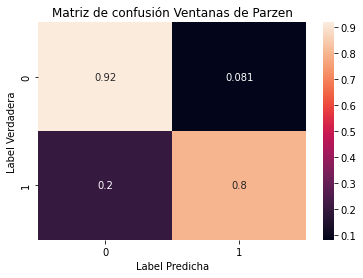

In [ ]:
hs = [0.5]
experimentos_parzen, matrisPARZEN = experimentarParzen(X,Y, hs)
calcularMatrizCF(matrisPARZEN, "Matriz de confusión Ventanas de Parzen")

# GBT (Gradient Boosting Tree)

In [ ]:
def experimentar_gbt(num_trees, X, Y):
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    conf_matrix_list_of_arrays = np.zeros(2)
    for trees in num_trees:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        accuracy = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        j = 0
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo= GradientBoostingClassifier(n_estimators=trees)
            modelo.fit(Xtrain,Ytrain)
            conf_matrix = confusion_matrix(Ytest, modelo.predict(Xtest))
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            #predecir muestras de entrenamiento
            Ytrain_pred =  modelo.predict(Xtrain)
            #predecir muestras de pruebas
            Yest = modelo.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
            accuracy.append(modelo.score(Xtest, Ytest))
            Macc.append(accuracy_score(Ytest, Yest))
            Mpre.append(precision_score(Ytest, Yest, zero_division=0))
            Mrec.append(recall_score(Ytest, Yest, zero_division=0))
            Mf1.append(f1_score(Ytest, Yest, zero_division=0))

        resultados.loc[idx,'número de arboles'] = trees
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx= idx +1
        
    return (resultados, conf_matrix_list_of_arrays)

Resultados para el GBT

In [ ]:
arboles = [5,10,20,50,100, 150, 200, 250]
resultados_gbt, matris = experimentar_gbt(arboles, X, Y)
resultados_gbt

,número de arboles,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,5.0,0.896713,0.011770,0.832897,0.139308,0.832897,0.4,0.266673,0.319825
1,10.0,0.918641,0.003567,0.869836,0.098159,0.869836,0.4,0.305740,0.346361
2,20.0,0.932116,0.004627,0.895902,0.078583,0.895902,0.4,0.332347,0.362879
3,50.0,0.950977,0.004189,0.911982,0.063705,0.911982,0.4,0.348387,0.372343
4,100.0,0.964549,0.003344,0.922630,0.058858,0.922630,0.4,0.357423,0.377436
5,150.0,0.970803,0.002938,0.925456,0.055560,0.925456,0.4,0.359870,0.378798
6,200.0,0.976261,0.002676,0.926977,0.054653,0.926977,0.4,0.361406,0.379656
7,250.0,0.980270,0.002361,0.927412,0.054514,0.927412,0.4,0.361854,0.379903


Mejor resultado GBT

In [ ]:
(resultados_gbt
 .groupby(['número de arboles'], as_index=False)['accuracy real'].mean()
 .sort_values(by='accuracy real', ascending = False)
 .head(1))

,número de arboles,accuracy real
7,250.0,0.927412


Matriz de confusión GBT

[[0.94153515 0.05846485]
 [0.09597352 0.90402648]]


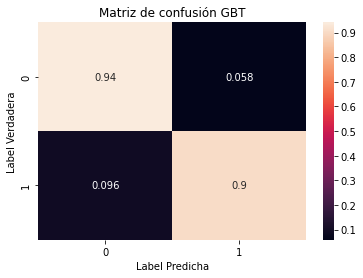

In [ ]:
arboles = [250]
resultados_gbt, matrisGBT = experimentar_gbt(arboles, X, Y)
calcularMatrizCF(matrisGBT, "Matriz de confusión GBT")

##Redes Neuronales Artificales(MLP) 



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix


In [ ]:
#import warnings
def experimetar_mlpc(X,Y, num_hidden_layers, num_neurons):
    #warnings.filterwarnings("ignore")
    #Validamos el modelo
    Folds = 10
    skf = KFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        #Macc = []
        #Mpre = []
        #Mrec = []
        #Mf1 = []
        for neurons in num_neurons:
            Macc = []
            Mpre = []
            Mrec = []
            Mf1 = []
            EficienciaVal = []
            for j, (train, test) in enumerate(skf.split(X, Y)):
                # para almacenar errores intermedios
                Error = np.zeros(Folds)
                Xtrain= X[train,:]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]
                #Normalizamos los datos
                scaler = StandardScaler().fit(X= Xtrain)       
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple(hidden_layers * [neurons])
                #print(hidden_layer_sizes)
                mlp = MLPClassifier(activation='tanh', hidden_layer_sizes= hidden_layer_sizes, max_iter= 1000)
                # entrenar el MLP
                mlp.fit(X=Xtrain, y=Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(Xtest)
                #Mida el error absoluto medio para cada una de las dos salidas
                #Observe bien la documentación. recordar que esta resolviendo
                # un problema de multiples salidas
                #Error[j] = accuracy_score(Ytest, Yest)
                Macc.append(accuracy_score(Ytest, Yest))
                Mpre.append(precision_score(Ytest, Yest,zero_division=0))
                Mrec.append(recall_score(Ytest, Yest,zero_division=0))
                Mf1.append(f1_score(Ytest, Yest,zero_division=0))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))

            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx,'accuracy real'] = np.mean(Macc)
            resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
            resultados.loc[idx,'precision_score'] = np.mean(Mpre)
            resultados.loc[idx,'recall_score'] = np.mean(Mrec)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)

            idx+=1
    return (resultados)

In [ ]:
resultados_mlpc = experimetar_mlpc(X, Y, [1,2,12,20], [12,16,20,24,30,40,50])
resultados_mlpc

,capas ocultas,neuronas en capas ocultas,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,1.0,12.0,0.902206,0.053035,0.399441,0.348309,0.372002
1,1.0,16.0,0.902204,0.053536,0.399718,0.349149,0.372561
2,1.0,20.0,0.907201,0.043772,0.399458,0.353025,0.374745
3,1.0,24.0,0.903513,0.056559,0.399723,0.347716,0.371782
4,1.0,30.0,0.908942,0.051103,0.399725,0.353187,0.374882
5,1.0,40.0,0.911334,0.050264,0.399452,0.356231,0.376439
6,1.0,50.0,0.908938,0.049964,0.399723,0.354011,0.375360
7,2.0,12.0,0.891990,0.059484,0.399153,0.349110,0.372216
8,2.0,16.0,0.894160,0.057065,0.399420,0.344427,0.369669
9,2.0,20.0,0.896117,0.051761,0.399176,0.347291,0.371379


Mejor resultado en Redes Neuronas Artificales(MLP)

In [ ]:
(resultados_mlpc
 .groupby(['capas ocultas','neuronas en capas ocultas'], as_index=False)['accuracy real'].mean()
 .sort_values(by='accuracy real', ascending = False)
 .head(1))

NameError: ignored

In [ ]:
resultados_mlpc = experimetar_mlpc(X, Y, [1], [50])

# Maquinas de Soporte Vectorial(SVM)

In [ ]:
#ejercicio de código
def experiementarSVC(x, y, kernels, gammas,params_reg):
    idx = 0
    kf = KFold(n_splits=10) 
    # crear una lista con la combinaciones de los elementos de cada list
    kernels_gammas_regs = list(itertools.product(kernels, gammas, params_reg))
    resultados = pd.DataFrame()
    conf_matrix_list_of_arrays = np.zeros(2)
    for params in kernels_gammas_regs:
        kernel, gamma, param_reg = params
        ''' print("parametros usados", params) # puede usar para ver los params '''
        errores_train = []
        errores_test = []
        EficienciaVal = []
        pct_support_vectors = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        for train_index, test_index in kf.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]  
            # normalizar los datos
            scaler = StandardScaler().fit(X= X_train)  
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            svm = SVC(kernel=kernel, gamma=gamma, C= param_reg)
            # Entrenar el modelo
            svm.fit(X=X_train, y=y_train)
            # calculo de errores
            y_train_pred = svm.predict(X=X_train)
            y_test_pred = svm.predict(X=X_test)
            conf_matrix = confusion_matrix(y_test, svm.predict(X_test))
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            # error y pct de vectores de soporte
            errores_train.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
            errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))
            # contar muestras de entrenamiento
            n_train = X_train.shape[0]
            pct_vs = ( svm.support_vectors_.shape[0] /n_train)
            pct_support_vectors.append(pct_vs)
            #ypredict.append((y_test_pred))
            #ytesetes.append((y_test))
            Macc.append(accuracy_score(y_test, y_test_pred))
            Mpre.append(precision_score(y_test, y_test_pred,zero_division=0))
            Mrec.append(recall_score(y_test, y_test_pred,zero_division=0))
            Mf1.append(f1_score(y_test, y_test_pred,zero_division=0))
            EficienciaVal.append(np.mean(y_test_pred.ravel() == y_test.ravel()))

    
        resultados.loc[idx,'kernel'] = kernel
        resultados.loc[idx,'gamma'] = gamma
        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        resultados.loc[idx,'% de vectores de soporte'] = np.mean(pct_support_vectors)*100
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        
        idx+=1
    return (resultados, conf_matrix_list_of_arrays)

Resultados SVM

In [ ]:
# vamos a realizar los experimentos
resultadosSVC, matrisSVM = experiementarSVC(x =X ,y=Y,
                                 kernels=['linear', 'rbf'],
                                 gammas = [0.01,0.1],
                                 params_reg = [0.001, 0.01,0.1, 1,10]
                                )

resultadosSVC

,kernel,gamma,param_reg,error de entrenamiento,error de prueba,% de vectores de soporte,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,linear,0.01,0.001,0.894516,0.842689,45.461014,0.842689,0.110512,0.400000,0.285970,0.333063
1,linear,0.01,0.010,0.923495,0.883308,28.827013,0.883308,0.061370,0.399413,0.331563,0.362074
2,linear,0.01,0.100,0.932334,0.893516,22.316378,0.893516,0.053175,0.399433,0.343027,0.368914
3,linear,0.01,1.000,0.933831,0.896990,19.966654,0.896990,0.049370,0.399443,0.347889,0.371764
4,linear,0.01,10.000,0.935497,0.898946,19.387067,0.898946,0.049390,0.399446,0.349221,0.372527
5,linear,0.10,0.001,0.894516,0.842689,45.461014,0.842689,0.110512,0.400000,0.285970,0.333063
6,linear,0.10,0.010,0.923495,0.883308,28.827013,0.883308,0.061370,0.399413,0.331563,0.362074
7,linear,0.10,0.100,0.932334,0.893516,22.316378,0.893516,0.053175,0.399433,0.343027,0.368914
8,linear,0.10,1.000,0.933831,0.896990,19.966654,0.896990,0.049370,0.399443,0.347889,0.371764
9,linear,0.10,10.000,0.935497,0.898946,19.387067,0.898946,0.049390,0.399446,0.349221,0.372527


Mejor resultado SVM

In [ ]:
(resultadosSVC
 .groupby(['kernel','gamma','param_reg'], as_index=False)['accuracy real'].mean()
 .sort_values(by='accuracy real', ascending = False)
 .head(1))

,kernel,gamma,param_reg,accuracy real
14,rbf,0.01,10.0,0.914592


Matriz de confusión SVM

[[0.91535151 0.08464849]
 [0.12630998 0.87369002]]


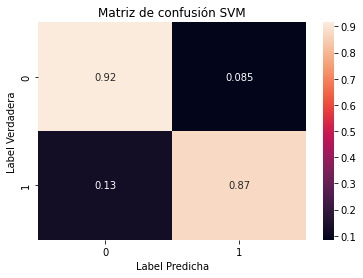

In [ ]:
resultadosSVC, matrisSVM  = experiementarSVC(x = X,y=Y,
                                 kernels=['linear'],
                                 gammas = [0.01],
                                 params_reg = [10]
                                )
calcularMatrizCF(matrisSVM, "Matriz de confusión SVM")

# Random Forest (RF)

In [ ]:
#ejercicio de código
def experimentar_rf(num_trees,numero_de_variables, X, Y):
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    conf_matrix_list_of_arrays = np.zeros(2)
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            Macc = []
            Mpre = []
            Mrec = []
            Mf1 = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                modelo = RandomForestClassifier(n_estimators=trees, max_features=num_variables, criterion="gini")
                modelo.fit(Xtrain,Ytrain)
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain)
                #predecir muestras de pruebas
                Yest = modelo.predict(Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
                conf_matrix = confusion_matrix(Ytest, modelo.predict(Xtest))
                conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
                Macc.append(accuracy_score(Ytest, Yest))
                Mpre.append(precision_score(Ytest, Yest,zero_division=0))
                Mrec.append(recall_score(Ytest, Yest,zero_division=0))
                Mf1.append(f1_score(Ytest, Yest,zero_division=0))



            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
            resultados.loc[idx,'accuracy real'] = np.mean(Macc)
            resultados.loc[idx,'precision_score'] = np.mean(Mpre)
            resultados.loc[idx,'recall_score'] = np.mean(Mrec)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)
            idx= idx +1
        print(f"termina para {trees} arboles")
        
    return (resultados, conf_matrix_list_of_arrays)

Resultados Random Forest

In [ ]:
arboles = [5,10,20,50,100, 150]
variables_seleccion = [5,10,15,20,25]
resultados_rf, matrisRF= experimentar_rf(arboles, variables_seleccion, X, Y)
resultados_rf

Mejor resultado Random Forest

In [ ]:
(resultados_rf
 .groupby(['número de arboles','variables para la selección del mejor umbral'], as_index=False)['accuracy real'].mean()
 .sort_values(by='accuracy real', ascending = False)
 .head(1))

Matriz de confusión Random Forest

In [ ]:
arboles = [50]
variables_seleccion = [5]
resultados_rf, matrisRF = experimentar_rf(arboles, variables_seleccion, X, Y)
calcularMatrizCF(matrisRF, "Matriz de confusión RF")

# Analísis Individual de las Características

##Matriz de correlación e índice de Fisher

In [ ]:
def fisher_index(X, plot=True):
    C = X.shape[1]
    indexes = np.zeros(57)

    j = 0
    for i in range(C):
        if_j = 0
        for k in range(C):
            if i == k:
                continue
            mean_i = np.mean(X[:,i])
            mean_k = np.mean(X[:,k])
            std_i = np.std(X[:,i])
            std_k = np.std(X[:,k])

            if_j += ((mean_i - mean_k)**2 )/(std_i**2 + std_k**2)
        indexes[j] = if_j
        j += 1

    indexes = indexes / np.max(indexes)
  
    if plot == True:
        x = np.array(np.linspace(0, C, C))
        y = indexes
        plt.stem(x, y)
        plt.xlabel('Variables')
        plt.ylabel('Índice de fisher')
        plt.show()    
    return indexes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


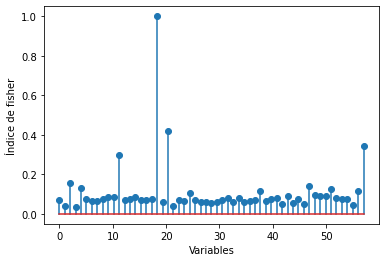

array([0.07197338, 0.03894275, 0.15404045, 0.03713677, 0.13320517,
       0.07377134, 0.06659614, 0.06526576, 0.07324888, 0.08799136,
       0.08423323, 0.29836945, 0.07159959, 0.07624529, 0.08515128,
       0.071055  , 0.06834535, 0.07516624, 1.        , 0.06098041,
       0.41977816, 0.04123443, 0.06837427, 0.06318282, 0.10452998,
       0.07168898, 0.06192807, 0.05870878, 0.05609136, 0.0621177 ,
       0.0704568 , 0.0816959 , 0.05775984, 0.08125147, 0.05839065,
       0.06513942, 0.06858427, 0.1164564 , 0.06555943, 0.07328845,
       0.08128711, 0.04907219, 0.08924599, 0.05734313, 0.07382672,
       0.04784208, 0.14243467, 0.09384891, 0.09252161, 0.08852299,
       0.12371348, 0.08071729, 0.07685437, 0.07673594, 0.04558067,
       0.1138191 , 0.34203646])

In [ ]:
fisher_index(X)

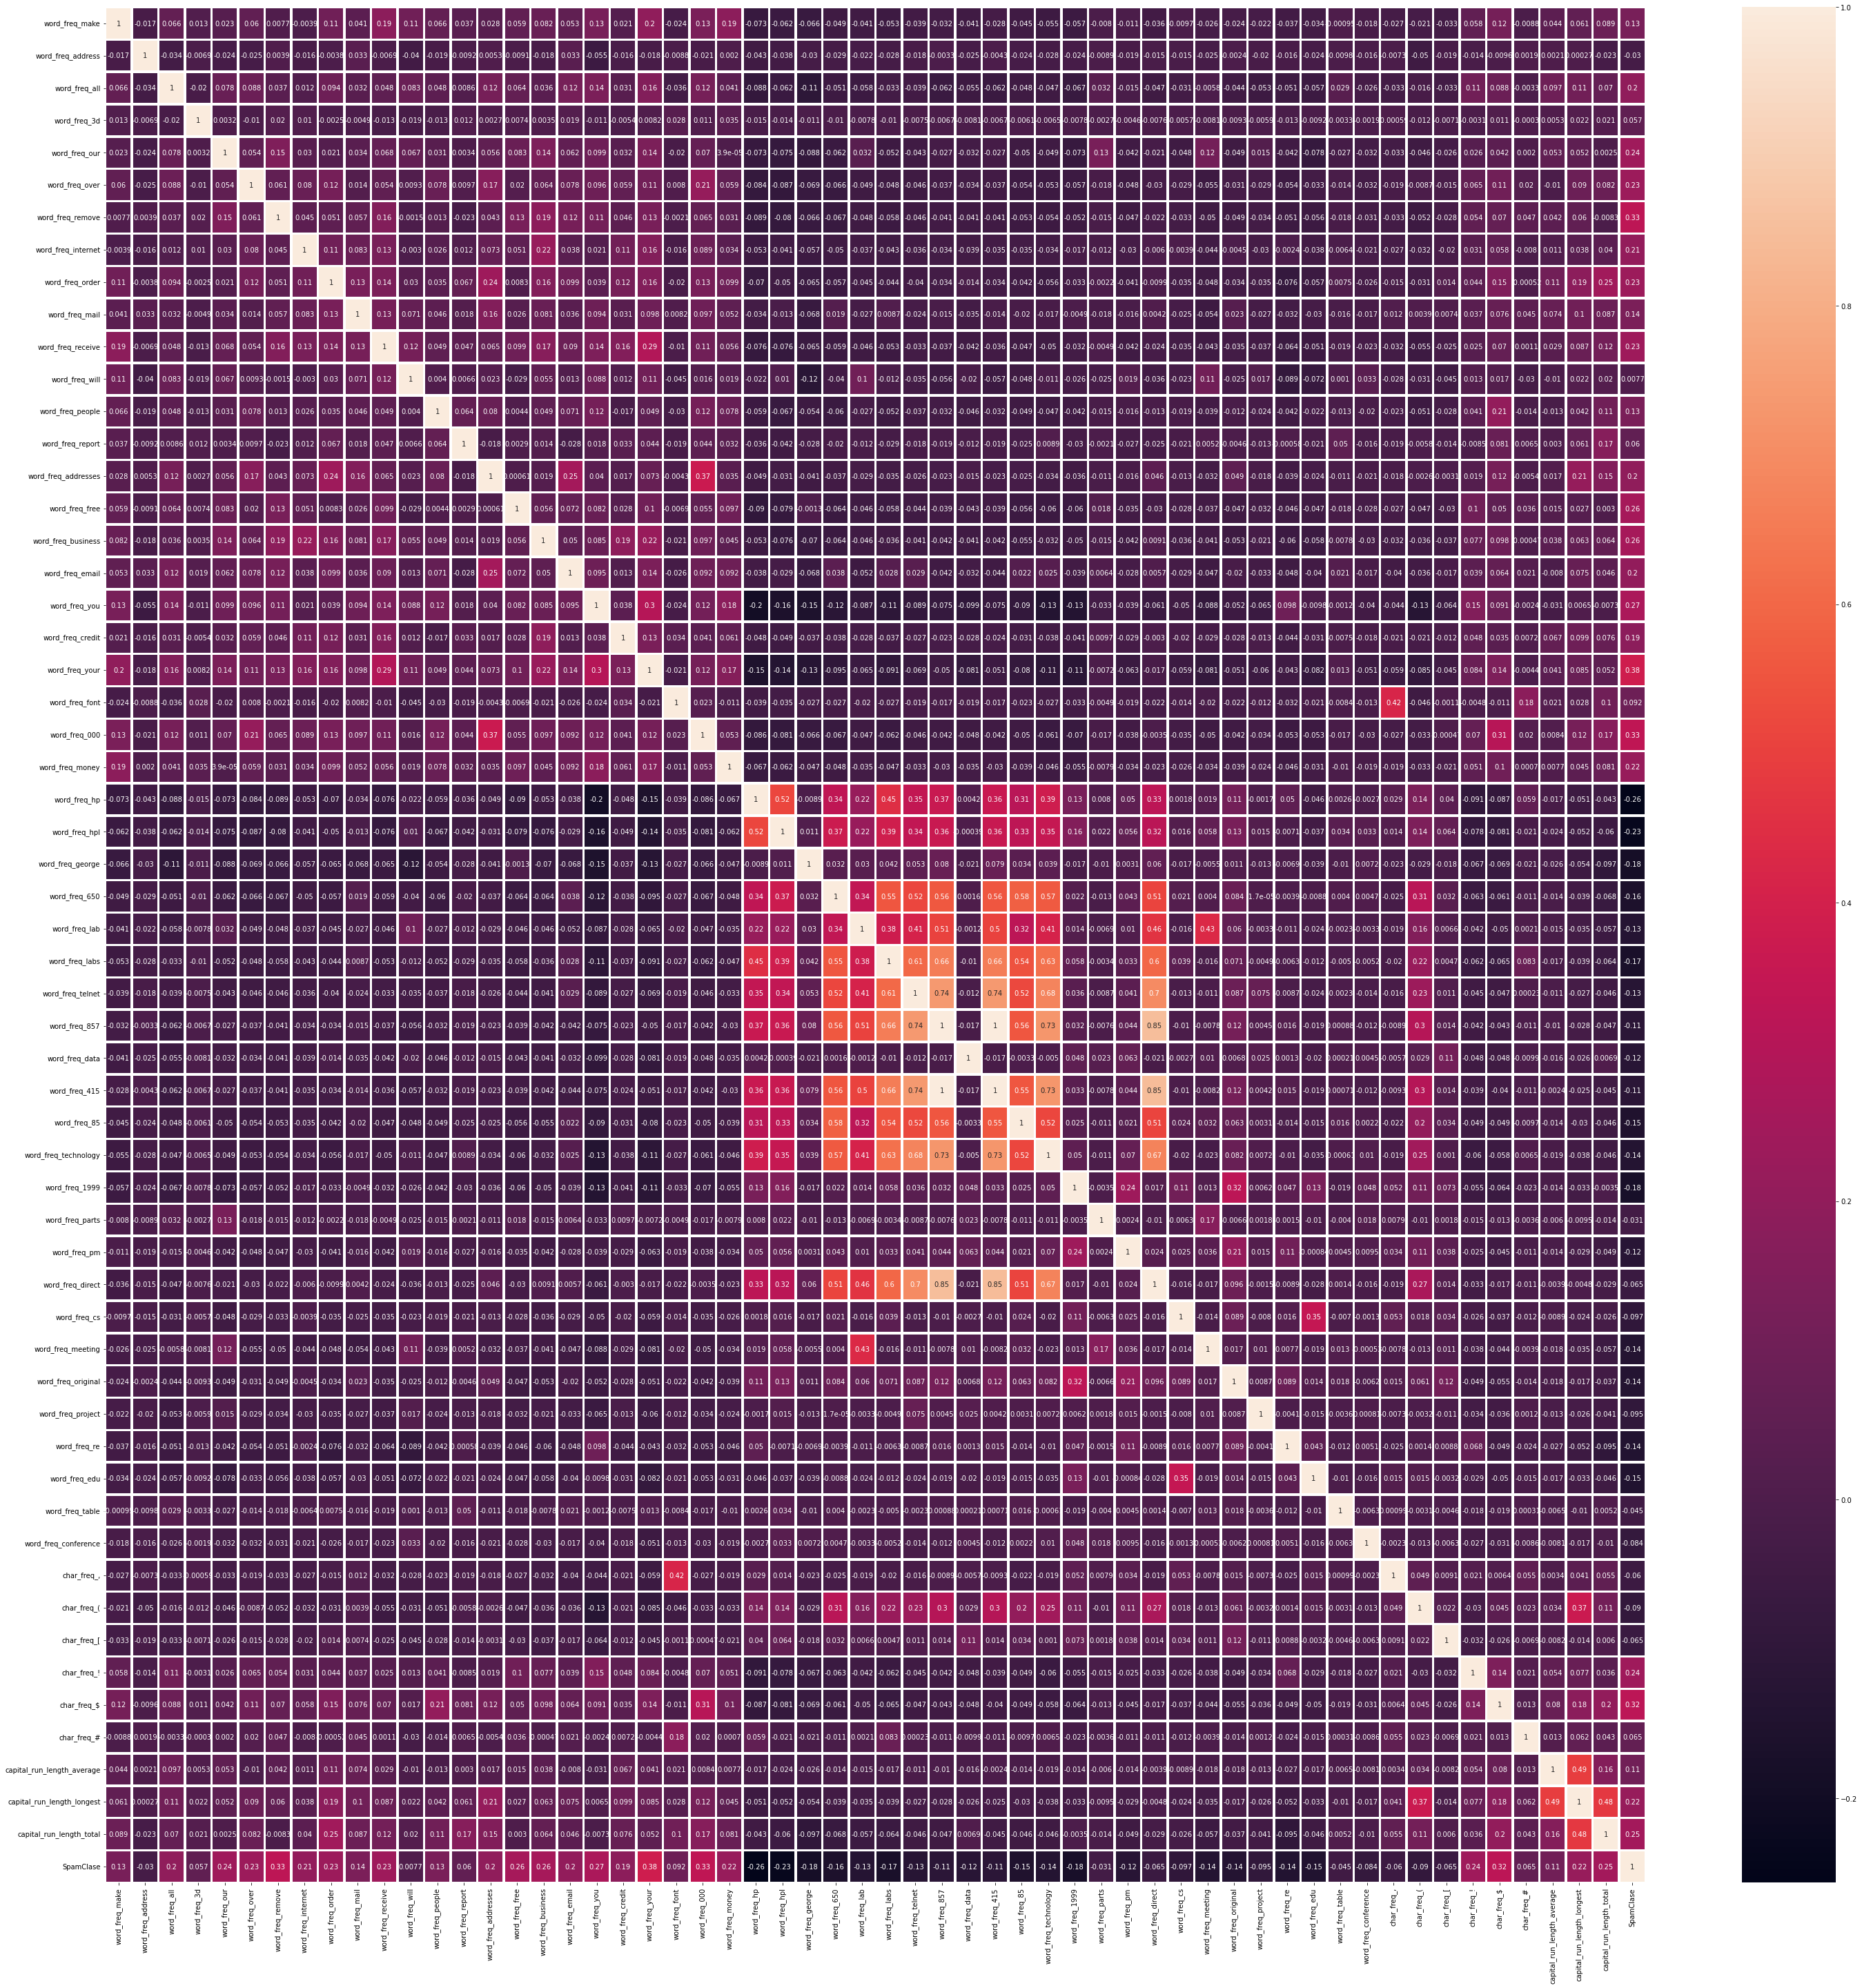

In [ ]:
corr = data.corr()
fig,ax= plt.subplots(figsize=(50,50))
sns.heatmap(corr,annot=True,linewidth=2.5,ax=ax)

# Selección de Características

Forward en Maquinas de Soporte Vectorial(SVM)

In [ ]:
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [52,53,54,55,56]
indexx = 0
for carac in caracteristicas:
    svm = SVC(kernel='rbf', gamma=0.01, C= 10)
    # Sequential Forward Selection
    sfs = SFS(svm, 
              k_features=carac, 
              forward=True, 
              floating=False, 
              scoring='accuracy',
              cv=10)
    sfs = sfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Forward Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sfs.k_score_
    indexx+=1

In [ ]:
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                          caracteristicas  caracteristicas elegidas                                                                                                                                                                                                  CV score
--  ----------------------------  -----------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Forward Selection                 40  (3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 54)                                                              0.933488
 1  Sequential Forward Selection                 50  (0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33

In [ ]:
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [49,50,52,53,54,55,56]
indexx = 0


svm = SVC(kernel='rbf', gamma=0.01, C= 10)
# Sequential Backward Selection
for carac in caracteristicas:
    sbs = SFS(svm, 
              k_features=carac, 
              forward=False, 
              floating=False, 
              scoring='accuracy',
              cv=10)
    sbs = sbs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbs.k_score_
    indexx+=1
###################################################


print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                           caracteristicas  caracteristicas elegidas                                                                                                                                                                                                  CV score
--  -----------------------------  -----------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Selection                 49  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54)                                0.935227
 1  Sequential Backward Selection                 50  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 

Debido al tiempo de ejecucion, se realizan el 56, 55 y 54 SFFS para SVM de manera independiente

In [ ]:
resultadosCaracteristicas = pd.DataFrame()
svm = SVC(kernel='rbf', gamma=0.01, C= 10)
sffs = SFS(svm, 
          k_features=56, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=10)
sffs = sffs.fit(X,Y)

In [ ]:
resultadosCaracteristicas = pd.DataFrame()
resultadosCaracteristicas.loc[0,'Nombre'] = "Sequential Forward Floating Selection"
resultadosCaracteristicas.loc[0,'caracteristicas'] = 56
resultadosCaracteristicas.loc[0,'caracteristicas elegidas'] = str(sffs.k_feature_idx_)
resultadosCaracteristicas.loc[0,'CV score'] = sffs.k_score_
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                   caracteristicas  caracteristicas elegidas                                                                                                                                                                                                  CV score
--  -------------------------------------  -----------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Forward Floating Selection                 56  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55)    0.914796


In [ ]:
resultadosCaracteristicas = pd.DataFrame()
svm = SVC(kernel='rbf', gamma=0.01, C= 10)
sffs = SFS(svm, 
          k_features=55, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=10)
sffs = sffs.fit(X,Y)
resultadosCaracteristicas = pd.DataFrame()
resultadosCaracteristicas.loc[0,'Nombre'] = "Sequential Forward Floating Selection"
resultadosCaracteristicas.loc[0,'caracteristicas'] = 55
resultadosCaracteristicas.loc[0,'caracteristicas elegidas'] = str(sffs.k_feature_idx_)
resultadosCaracteristicas.loc[0,'CV score'] = sffs.k_score_
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

In [ ]:
resultadosCaracteristicas = pd.DataFrame()
svm = SVC(kernel='rbf', gamma=0.01, C= 10)
sffs = SFS(svm, 
          k_features=54, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=10)
sffs = sffs.fit(X,Y)
resultadosCaracteristicas = pd.DataFrame()
resultadosCaracteristicas.loc[0,'Nombre'] = "Sequential Forward Floating Selection"
resultadosCaracteristicas.loc[0,'caracteristicas'] = 54
resultadosCaracteristicas.loc[0,'caracteristicas elegidas'] = str(sffs.k_feature_idx_)
resultadosCaracteristicas.loc[0,'CV score'] = sffs.k_score_
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

Sequential Backward Floating Selection (SBFS): (el escogido por tiempo de ejecucion y buenas tasas de predicción)

SVM (SBFS):

In [ ]:
###################################################
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from tabulate import tabulate
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [49,50,52,53,54,55,56]
indexx = 0
# Sequential Backward Floating Selection
for carac in caracteristicas:
    svm = SVC(kernel='rbf', gamma=0.01, C= 10)
    sbfs = SFS(svm, 
              k_features=carac, 
              forward=False, 
              floating=True, 
              scoring='accuracy',
              cv=10)
    sbfs = sbfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Floating Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbfs.k_score_
    indexx+=1
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                    caracteristicas  caracteristicas elegidas                                                                                                                                                                                                  CV score
--  --------------------------------------  -----------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Floating Selection                 49  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54)                                0.935227
 1  Sequential Backward Floating Selection                 50  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 

RANDOM FOREST (SBFS):

In [ ]:
########################Sequential Backward Floating Selection
###################################################
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from tabulate import tabulate
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [49,50,52,53,54,55,56]
indexx = 0
# Sequential Backward Floating Selection
for carac in caracteristicas:
    rf = RandomForestClassifier(n_estimators=50, max_features=5, criterion="gini")
    sbfs = SFS(rf, 
              k_features=carac, 
              forward=False, 
              floating=True, 
              scoring='accuracy',
              cv=10)
    sbfs = sbfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Floating Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbfs.k_score_
    indexx+=1
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                    caracteristicas  caracteristicas elegidas                                                                                                                                                                                                  CV score
--  --------------------------------------  -----------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Floating Selection                 49  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56)                               0.942618
 1  Sequential Backward Floating Selection                 50  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,

GBT (SBFS):

In [ ]:
########################Sequential Backward Floating Selection 
###################################################
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [54,55,56]
indexx = 0
# Sequential Backward Floating Selection
for carac in caracteristicas:
    gbt = GradientBoostingClassifier(n_estimators=150)
    sbfs = SFS(gbt, 
              k_features=carac, 
              forward=False, 
              floating=True, 
              scoring='accuracy',
              cv=10)
    sbfs = sbfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Floating Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbfs.k_score_
    indexx+=1
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                    caracteristicas  caracteristicas elegidas                                                                                                                                                                                                  CV score
--  --------------------------------------  -----------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Floating Selection                 54  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56)            0.943052
 1  Sequential Backward Floating Selection                 55  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,

# Extracción de Características

PCA EN SVM

In [ ]:
import time
from sklearn.decomposition import PCA
def entrenamiento_sin_seleccion_caracteristicas(splits, X, Y):

    #Implemetamos la metodología de validación
    Errores = np.ones(splits)
    Score = np.ones(splits)
    times = np.ones(splits)
    j = 0
    kf = KFold(n_splits=splits)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        #Creamos el clasificador SVM.
        clf = SVC(kernel='rbf', gamma=0.01, C= 10)
        #Aquí se entran y se valida el modelo sin hacer selección de características
        tiempo_i = time.time()
        clf.fit(X_train,y_train)
        # Validación del modelo
        y_test_pred =clf.predict(X_test)
        Errores[j] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred,zero_division=0))
        Mrec.append(recall_score(y_test, y_test_pred,zero_division=0))
        Mf1.append(f1_score(y_test, y_test_pred,zero_division=0))
        times[j] = time.time()-tiempo_i
        j+=1

    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
#ejercicio de código
def entrenamiento_pca_ext_caracteristicas(n_comp, X, Y):

    #Implemetamos la metodología de validación 
    Errores = np.ones(10)
    times = np.ones(10)
    j = 0
    kf = KFold(n_splits=10)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):  
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # ¿es necesario estandarizacion de datos?
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
 
        #dejar el mismo nombre del objeto 
        pca = PCA(n_components=n_comp)
        # para calcular costo computacional
        tiempo_i = time.time()
        # es recomendable usar el metodo que ajusta y transforma
        X_train_pca = pca.fit_transform(X=X_train)
        # aca solo usar el metodo de transformar (ya que en el anterior el pca se ajusto)
        X_test_pca = pca.transform(X=X_test)
        # entrenar el modelo usando las caractieristicas transformadas por PCA
        clf = SVC(kernel='rbf', gamma=0.01, C= 10)
        clf.fit(X=X_train_pca, y=y_train)
        y_test_pred =clf.predict(X_test_pca)
        Errores[j] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred,zero_division=0))
        Mrec.append(recall_score(y_test, y_test_pred,zero_division=0))
        Mf1.append(f1_score(y_test, y_test_pred,zero_division=0))
        tiempo_o = time.time()-tiempo_i
        times[j] = tiempo_o
        j+=1


    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
    
#ejercicio de código
def experimentar_PCA(n_feats, X, Y):

    df = pd.DataFrame()
    idx = 0
    split_number = 10
    #Sin selección de características
    error, ic_error, t_ex, presicion, recall, f1s= entrenamiento_sin_seleccion_caracteristicas(split_number, X,Y)  
    df.loc[idx,'CON_SEL'] = 'NO'
    df.loc[idx,'NUM_VAR'] = X.shape[1] # se usan todas las caracteristicas
    df.loc[idx,'T_EJECUCION'] = t_ex
    df.loc[idx,'ACCURACY'] = error
    df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
    df.loc[idx,'precision_score'] = presicion
    df.loc[idx,'recall_score'] = recall
    df.loc[idx,'f1_score'] = f1s
    idx+=1
    print("termina experimento sin selección")
    #Con selección de características
    
    for f in n_feats:
        #Implemetamos la metodología de validación 
        error,ic_error,t_ex, presicion, recall, f1s  = entrenamiento_pca_ext_caracteristicas(n_comp=f, X=X,Y=Y)
        df.loc[idx,'CON_SEL'] = 'SI'
        df.loc[idx,'NUM_VAR'] = f # se usan todas las caracteristicas
        df.loc[idx,'T_EJECUCION'] = t_ex
        df.loc[idx,'ACCURACY'] = error
        df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
        df.loc[idx,'precision_score'] = presicion
        df.loc[idx,'recall_score'] = recall
        df.loc[idx,'f1_score'] = f1s
        idx+=1
    return df

In [ ]:
SVMresultadosPCA = experimentar_PCA([33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56], X, Y)
SVMresultadosPCA

termina experimento sin selección


,CON_SEL,NUM_VAR,T_EJECUCION,ACCURACY,INTERVALO DE CONFIANZA,precision_score,recall_score,f1_score
0,NO,57.0,0.655388,0.914592,0.049016,0.399444,0.347680,0.371709
1,SI,33.0,0.488126,0.911550,0.042550,0.399719,0.347422,0.371640
2,SI,34.0,0.492558,0.909159,0.043732,0.399719,0.345682,0.370656
3,SI,35.0,0.494770,0.912202,0.044218,0.399721,0.346145,0.370930
4,SI,36.0,0.472221,0.908944,0.046005,0.399721,0.344626,0.370064
5,SI,37.0,0.482827,0.908944,0.048862,0.399719,0.344381,0.369910
6,SI,38.0,0.519736,0.911552,0.048098,0.399723,0.345973,0.370841
7,SI,39.0,0.511906,0.908726,0.049217,0.399718,0.344149,0.369767
8,SI,40.0,0.503532,0.907422,0.048142,0.399718,0.343497,0.369410
9,SI,41.0,0.498993,0.906118,0.048821,0.399718,0.342613,0.368902


PCA EN RANDOM FOREST

In [ ]:
import time
from sklearn.decomposition import PCA
def entrenamiento_sin_seleccion_caracteristicas_rf(splits, X, Y):

    #Implemetamos la metodología de validación
    Errores = np.ones(splits)
    Score = np.ones(splits)
    times = np.ones(splits)
    j = 0
    kf = KFold(n_splits=splits)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        #Creamos el clasificador SVM.
        clf = RandomForestClassifier(n_estimators=50, max_features=5, criterion="gini")
        #Aquí se entran y se valida el modelo sin hacer selección de características
        tiempo_i = time.time()
        clf.fit(X_train,y_train)
        y_test_pred =clf.predict(X_test)
        # Validación del modelo
        Errores[j] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred,zero_division=0))
        Mrec.append(recall_score(y_test, y_test_pred,zero_division=0))
        Mf1.append(f1_score(y_test, y_test_pred,zero_division=0))
        times[j] = time.time()-tiempo_i
        j+=1

    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
#ejercicio de código
def entrenamiento_pca_ext_caracteristicas_rf(n_comp, X, Y):

    #Implemetamos la metodología de validación 
    Errores = np.ones(10)
    times = np.ones(10)
    j = 0
    kf = KFold(n_splits=10)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):  
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # ¿es necesario estandarizacion de datos?
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
 
        #dejar el mismo nombre del objeto 
        pca = PCA(n_components=n_comp)
        # para calcular costo computacional
        tiempo_i = time.time()
        # es recomendable usar el metodo que ajusta y transforma
        X_train_pca = pca.fit_transform(X=X_train)
        # aca solo usar el metodo de transformar (ya que en el anterior el pca se ajusto)
        X_test_pca = pca.transform(X=X_test)
        # entrenar el modelo usando las caractieristicas transformadas por PCA
        clf = RandomForestClassifier(n_estimators=50, max_features=5, criterion="gini")
        clf.fit(X=X_train_pca, y=y_train)
        y_test_pred =clf.predict(X_test_pca)
        Errores[j] = accuracy_score(y_true=y_test, y_pred= y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred,zero_division=0))
        Mrec.append(recall_score(y_test, y_test_pred,zero_division=0))
        Mf1.append(f1_score(y_test, y_test_pred,zero_division=0))
        tiempo_o = time.time()-tiempo_i
        times[j] = tiempo_o
        j+=1


    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
    
#ejercicio de código
def experimentar_PCA_RF(n_feats, X, Y):

    df = pd.DataFrame()
    idx = 0
    split_number = 10
    #Sin selección de características
    error, ic_error, t_ex, presicion, recall, f1s= entrenamiento_sin_seleccion_caracteristicas_rf(split_number, X,Y)  
    df.loc[idx,'CON_SEL'] = 'NO'
    df.loc[idx,'NUM_VAR'] = X.shape[1] # se usan todas las caracteristicas
    df.loc[idx,'T_EJECUCION'] = t_ex
    df.loc[idx,'ACCURACY'] = error
    df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
    df.loc[idx,'precision_score'] = presicion
    df.loc[idx,'recall_score'] = recall
    df.loc[idx,'f1_score'] = f1s
    idx+=1
    print("termina experimento sin selección")
    #Con selección de características
    
    for f in n_feats:
        #Implemetamos la metodología de validación 
        error,ic_error,t_ex, presicion, recall, f1s  = entrenamiento_pca_ext_caracteristicas_rf(n_comp=f, X=X,Y=Y)
        df.loc[idx,'CON_SEL'] = 'SI'
        df.loc[idx,'NUM_VAR'] = f # se usan todas las caracteristicas
        df.loc[idx,'T_EJECUCION'] = t_ex
        df.loc[idx,'ACCURACY'] = error
        df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
        df.loc[idx,'precision_score'] = presicion
        df.loc[idx,'recall_score'] = recall
        df.loc[idx,'f1_score'] = f1s
        idx+=1
    return df

In [ ]:
RFresultadosPCA = experimentar_PCA_RF([33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56], X, Y)
RFresultadosPCA

termina experimento sin selección


,CON_SEL,NUM_VAR,T_EJECUCION,ACCURACY,INTERVALO DE CONFIANZA,precision_score,recall_score,f1_score
0,NO,57.0,0.499034,0.918071,0.070413,0.400000,0.353592,0.375174
1,SI,33.0,0.988666,0.900693,0.061635,0.399420,0.337265,0.365500
2,SI,34.0,0.971928,0.900690,0.057739,0.399433,0.338896,0.366572
3,SI,35.0,0.979387,0.902862,0.058096,0.399429,0.337548,0.365781
4,SI,36.0,0.997621,0.899600,0.058337,0.399424,0.339026,0.366591
5,SI,37.0,0.998563,0.900684,0.057450,0.399425,0.338602,0.366388
6,SI,38.0,0.986080,0.899603,0.058484,0.399427,0.336667,0.365257
7,SI,39.0,1.005675,0.898730,0.061251,0.399417,0.336795,0.365292
8,SI,40.0,1.006810,0.897647,0.062513,0.399415,0.332872,0.362990
9,SI,41.0,1.081620,0.897648,0.060135,0.399424,0.336205,0.364967


PCA EN GBT

In [ ]:
import time
from sklearn.decomposition import PCA
def entrenamiento_sin_seleccion_caracteristicas_gbt(splits, X, Y):

    #Implemetamos la metodología de validación
    Errores = np.ones(splits)
    Score = np.ones(splits)
    times = np.ones(splits)
    j = 0
    kf = KFold(n_splits=splits)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        #Creamos el clasificador SVM.
        gbt = GradientBoostingClassifier(n_estimators=150)
        #Aquí se entran y se valida el modelo sin hacer selección de características
        tiempo_i = time.time()
        gbt.fit(X_train,y_train)
        y_test_pred =gbt.predict(X_test)
        # Validación del modelo
        Errores[j] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred,zero_division=0))
        Mrec.append(recall_score(y_test, y_test_pred,zero_division=0))
        Mf1.append(f1_score(y_test, y_test_pred,zero_division=0))
        times[j] = time.time()-tiempo_i
        j+=1

    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
#ejercicio de código
def entrenamiento_pca_ext_caracteristicas_gbt(n_comp, X, Y):

    #Implemetamos la metodología de validación 
    Errores = np.ones(10)
    times = np.ones(10)
    j = 0
    kf = KFold(n_splits=10)
    Mpre = []
    Mrec = []
    Mf1 = []
    for train_index, test_index in kf.split(X):  
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # ¿es necesario estandarizacion de datos?
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
 
        #dejar el mismo nombre del objeto 
        pca = PCA(n_components=n_comp)
        # para calcular costo computacional
        tiempo_i = time.time()
        # es recomendable usar el metodo que ajusta y transforma
        X_train_pca = pca.fit_transform(X=X_train)
        # aca solo usar el metodo de transformar (ya que en el anterior el pca se ajusto)
        X_test_pca = pca.transform(X=X_test)
        # entrenar el modelo usando las caractieristicas transformadas por PCA
        gbt = GradientBoostingClassifier(n_estimators=150)
        gbt.fit(X=X_train_pca, y=y_train)
        y_test_pred =gbt.predict(X_test_pca)
        Errores[j] = accuracy_score(y_true=y_test, y_pred= y_test_pred)
        Mpre.append(precision_score(y_test, y_test_pred,zero_division=0))
        Mrec.append(recall_score(y_test, y_test_pred,zero_division=0))
        Mf1.append(f1_score(y_test, y_test_pred,zero_division=0))
        tiempo_o = time.time()-tiempo_i
        times[j] = tiempo_o
        j+=1


    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(Mpre), np.mean(Mrec), np.mean(Mf1)
#ejercicio de código
def experimentar_PCA_GBT(n_feats, X, Y):

    df = pd.DataFrame()
    idx = 0
    split_number = 10
    #Sin selección de características
    error, ic_error, t_ex, presicion, recall, f1s= entrenamiento_sin_seleccion_caracteristicas_gbt(split_number, X,Y)  
    df.loc[idx,'CON_SEL'] = 'NO'
    df.loc[idx,'NUM_VAR'] = X.shape[1] # se usan todas las caracteristicas
    df.loc[idx,'T_EJECUCION'] = t_ex
    df.loc[idx,'ACCURACY'] = error
    df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
    df.loc[idx,'precision_score'] = presicion
    df.loc[idx,'recall_score'] = recall
    df.loc[idx,'f1_score'] = f1s
    idx+=1
    print("termina experimento sin selección")
    #Con selección de características
    
    for f in n_feats:
        #Implemetamos la metodología de validación 
        error,ic_error,t_ex, presicion, recall, f1s  = entrenamiento_pca_ext_caracteristicas_gbt(n_comp=f, X=X,Y=Y)
        df.loc[idx,'CON_SEL'] = 'SI'
        df.loc[idx,'NUM_VAR'] = f # se usan todas las caracteristicas
        df.loc[idx,'T_EJECUCION'] = t_ex
        df.loc[idx,'ACCURACY'] = error
        df.loc[idx,'INTERVALO DE CONFIANZA'] = ic_error
        df.loc[idx,'precision_score'] = presicion
        df.loc[idx,'recall_score'] = recall
        df.loc[idx,'f1_score'] = f1s
        idx+=1
    return df

In [ ]:
GBTresultadosPCA = experimentar_PCA_GBT([33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56], X, Y)
GBTresultadosPCA

termina experimento sin selección


,CON_SEL,NUM_VAR,T_EJECUCION,ACCURACY,INTERVALO DE CONFIANZA,precision_score,recall_score,f1_score
0,NO,57.0,2.546176,0.925456,0.055560,0.400000,0.359870,0.378798
1,SI,33.0,6.858483,0.904813,0.054313,0.399433,0.345628,0.370463
2,SI,34.0,7.031367,0.894813,0.050825,0.399425,0.342297,0.368539
3,SI,35.0,7.232596,0.905461,0.055584,0.399430,0.348205,0.371900
4,SI,36.0,7.437791,0.906115,0.051653,0.399435,0.345857,0.370625
5,SI,37.0,7.665551,0.905031,0.053576,0.399424,0.344023,0.369490
6,SI,38.0,7.857678,0.903289,0.052411,0.399422,0.343136,0.368986
7,SI,39.0,8.052412,0.905463,0.054350,0.399425,0.345773,0.370507
8,SI,40.0,8.235799,0.905030,0.053519,0.399427,0.344484,0.369771
9,SI,41.0,8.413300,0.906985,0.051374,0.399432,0.346047,0.370702
